In [37]:
import os 
import pandas as pd
import numpy as np
import matplotlib as plt
import datetime as dt

In [38]:
path = "C:/Users/blk/OneDrive/Documenten/GitHub/ML-Final/AppliedML_Assign.01/Assignment2/Data"
os.chdir(path)
os.getcwd()

'C:\\Users\\blk\\OneDrive\\Documenten\\GitHub\\ML-Final\\AppliedML_Assign.01\\Assignment2\\Data'

In [39]:
data = pd.read_csv('A2_data_clean.csv')
data = data.drop('Unnamed: 0', axis = 1)

In [40]:
print(data)
print(data.isna().sum())

           Date  Temperature  Fuel_Price         CPI  Unemployment  IsHoliday   
0    2010-02-05    34.037333    2.717844  167.730885      8.619311          0  \
1    2010-02-12    34.151333    2.694022  167.825608      8.619311          1   
2    2010-02-19    37.719778    2.672067  167.871686      8.619311          0   
3    2010-02-26    39.243556    2.683933  167.909657      8.619311          0   
4    2010-03-05    42.917333    2.731200  167.947628      8.619311          0   
..          ...          ...         ...         ...           ...        ...   
177  2013-06-28    79.871111    3.629400  177.990680      6.719244          0   
178  2013-07-05    79.655778    3.583533  177.990680      6.719244          0   
179  2013-07-12    80.798667    3.568111  177.990680      6.719244          0   
180  2013-07-19    79.268667    3.683444  177.990680      6.719244          0   
181  2013-07-26    78.037333    3.734444  177.990680      6.719244          0   

        MarkDown1   MarkDow

Steps to take:
- normalize data
- create train test split
- setup model structure 
- train model
- make predictions

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [42]:
data["Date"] = pd.to_datetime(data["Date"])
data.head()

,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,MarkDown1,MarkDown3,MarkDown4,MarkDown5,Week,Weekly_Sales
0,2010-02-05,34.037333,2.717844,167.730885,8.619311,0,24089.612333,199.325256,24742.654163,4185.380333,5,49.0
1,2010-02-12,34.151333,2.694022,167.825608,8.619311,1,29880.900556,200.033519,19646.377135,5089.147556,6,48.0
2,2010-02-19,37.719778,2.672067,167.871686,8.619311,0,12536.748111,62.672919,7040.314331,5646.276000,7,48.0
3,2010-02-26,39.243556,2.683933,167.909657,8.619311,0,8504.312444,24.218426,2881.930628,4458.685000,8,43.0
4,2010-03-05,42.917333,2.731200,167.947628,8.619311,0,11293.039000,21.398405,6237.467212,2911.005778,9,46.0


In [43]:
# #create new column
# data["Month"] = data.Date.dt.month
# data["Year"] = data.Date.dt.year
# data["WeekofYear"] = data.Week

# #create dummies out of categorical column
# columns_to_encode = ["Month", "Year", "WeekofYear"]
# data = pd.get_dummies(data, columns=columns_to_encode)



In [44]:
print(
    data.head()
)

        Date  Temperature  Fuel_Price         CPI  Unemployment  IsHoliday   
0 2010-02-05    34.037333    2.717844  167.730885      8.619311          0  \
1 2010-02-12    34.151333    2.694022  167.825608      8.619311          1   
2 2010-02-19    37.719778    2.672067  167.871686      8.619311          0   
3 2010-02-26    39.243556    2.683933  167.909657      8.619311          0   
4 2010-03-05    42.917333    2.731200  167.947628      8.619311          0   

      MarkDown1   MarkDown3     MarkDown4    MarkDown5  Week  Weekly_Sales  
0  24089.612333  199.325256  24742.654163  4185.380333     5          49.0  
1  29880.900556  200.033519  19646.377135  5089.147556     6          48.0  
2  12536.748111   62.672919   7040.314331  5646.276000     7          48.0  
3   8504.312444   24.218426   2881.930628  4458.685000     8          43.0  
4  11293.039000   21.398405   6237.467212  2911.005778     9          46.0  


In [45]:
data.columns

Index(['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday',
       'MarkDown1', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Week',
       'Weekly_Sales'],
      dtype='object')

In [46]:
data.drop(['Date'],axis=1,inplace=True)
data.drop(['Week'],axis=1,inplace=True)
print(data.head(5))
data_train = data[data.Weekly_Sales.notnull()]
data_test = data[data.Weekly_Sales.isnull()]
X = data_train.drop('Weekly_Sales', axis=1)
y = data_train['Weekly_Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

   Temperature  Fuel_Price         CPI  Unemployment  IsHoliday     MarkDown1   
0    34.037333    2.717844  167.730885      8.619311          0  24089.612333  \
1    34.151333    2.694022  167.825608      8.619311          1  29880.900556   
2    37.719778    2.672067  167.871686      8.619311          0  12536.748111   
3    39.243556    2.683933  167.909657      8.619311          0   8504.312444   
4    42.917333    2.731200  167.947628      8.619311          0  11293.039000   

    MarkDown3     MarkDown4    MarkDown5  Weekly_Sales  
0  199.325256  24742.654163  4185.380333          49.0  
1  200.033519  19646.377135  5089.147556          48.0  
2   62.672919   7040.314331  5646.276000          48.0  
3   24.218426   2881.930628  4458.685000          43.0  
4   21.398405   6237.467212  2911.005778          46.0  


In [68]:
classifier = RandomForestRegressor()
classifier.fit(X_train, y_train)

RandomForestRegressor()

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = classifier.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 2.6210344827586214
Mean Squared Error: 23.478679310344827
R-squared: 0.46123958253751696


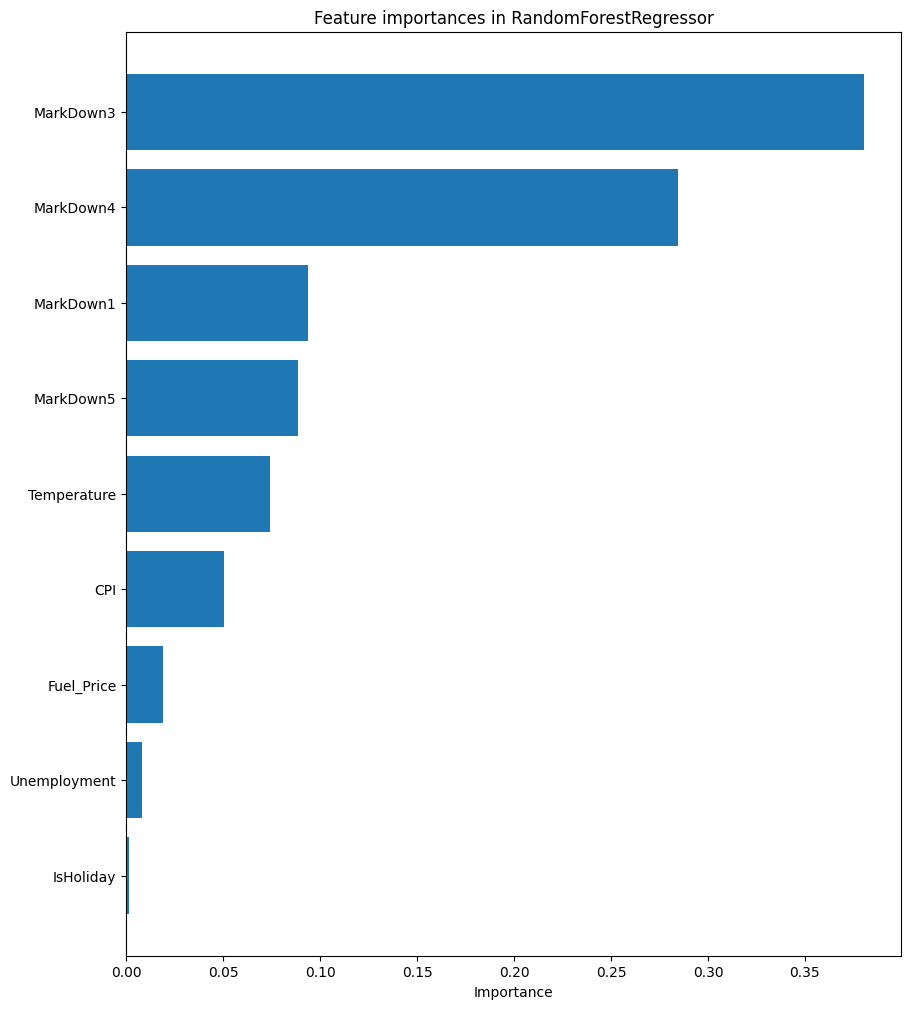

In [49]:
import matplotlib.pyplot as plt

feature_importance = classifier.feature_importances_
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(10, 12))
plt.barh(range(X_train.shape[1]), feature_importance[sorted_idx])
plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances in RandomForestRegressor')
plt.show()

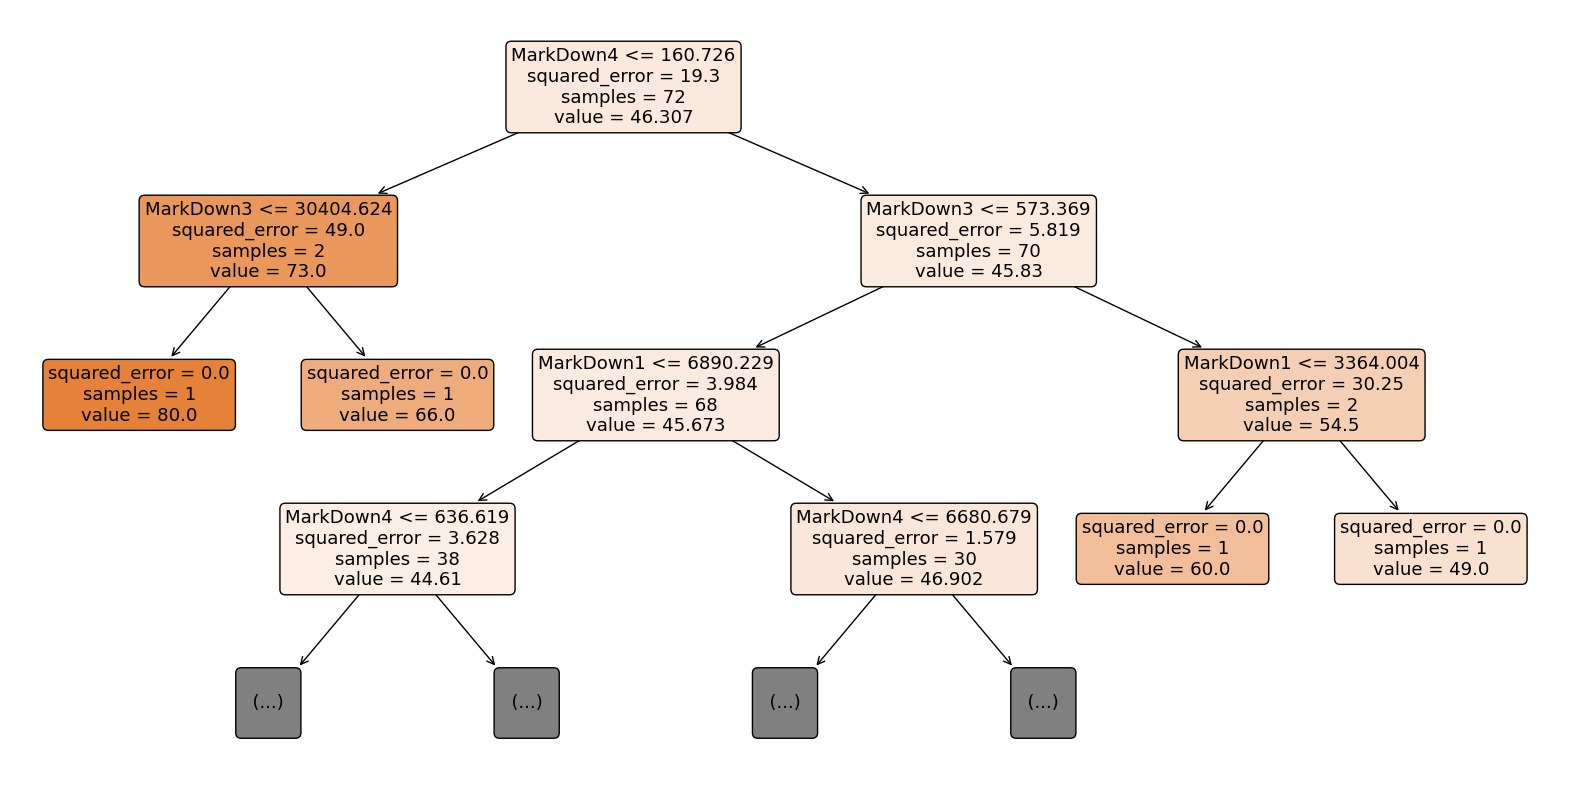

In [50]:
from sklearn.tree import plot_tree

# Plotting one tree from the forest
plt.figure(figsize=(20,10))
plot_tree(classifier.estimators_[0], filled=True, feature_names=X_train.columns, rounded=True, max_depth=3)
plt.show()

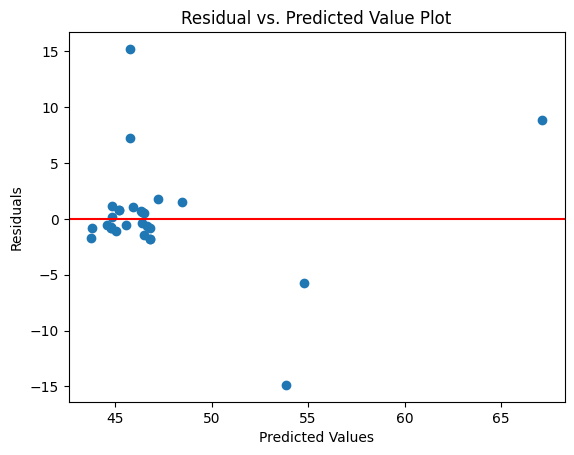

In [51]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual vs. Predicted Value Plot')
plt.show()

In [77]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_



In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_rf.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))    
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 2.320689655172413
Mean Squared Error: 21.45137931034482
R-squared: 0.5077596180081856


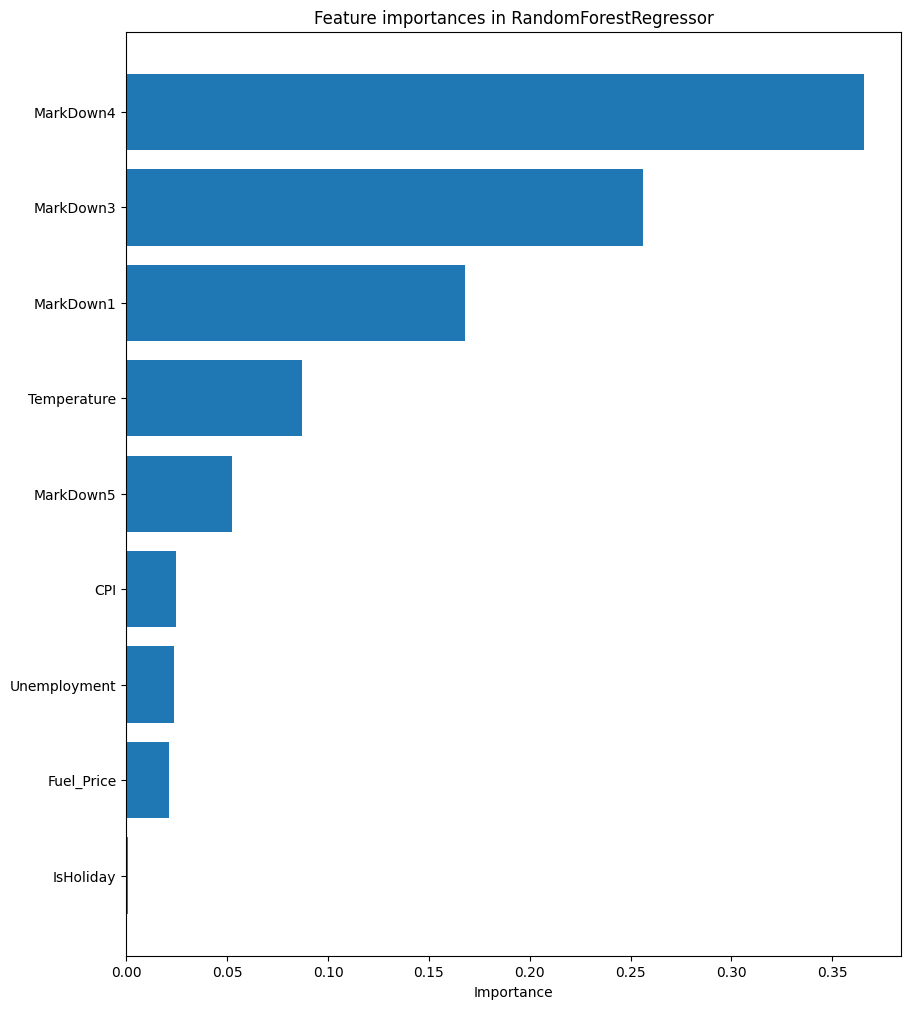

In [79]:
feature_importance = best_rf.feature_importances_
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(10, 12))
plt.barh(range(X_train.shape[1]), feature_importance[sorted_idx])
plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances in RandomForestRegressor')
plt.show()

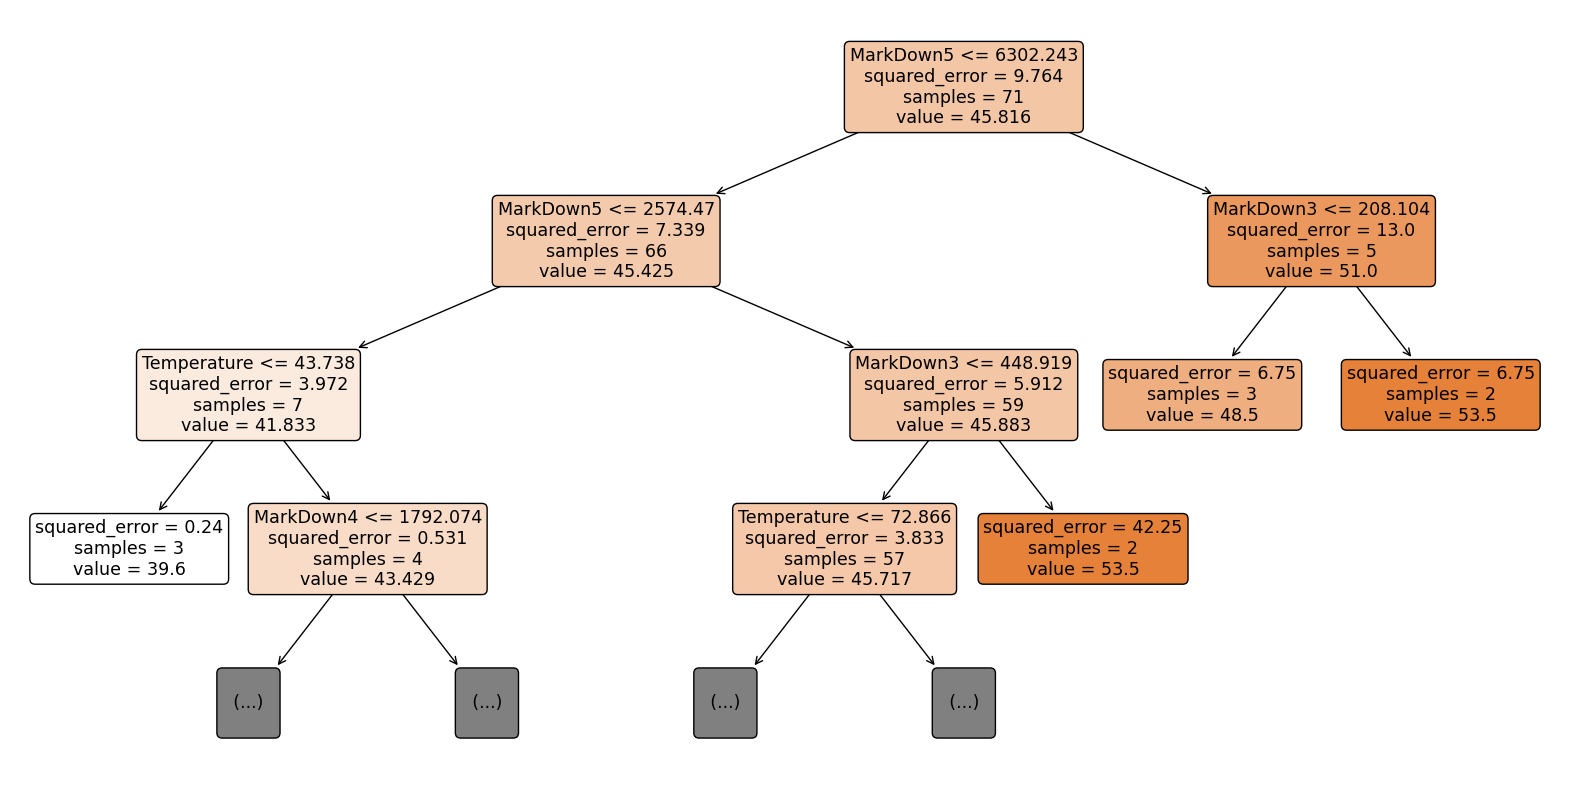

In [55]:
from sklearn.tree import plot_tree

# Plotting one tree from the forest
plt.figure(figsize=(20,10))
plot_tree(best_rf.estimators_[0], filled=True, feature_names=X_train.columns, rounded=True, max_depth=3)
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [28]:
# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [33]:
print(y_test)

123    48.0
42     65.0
121    48.0
73     47.0
86     42.0
33     41.0
32     43.0
126    51.0
62     44.0
43     49.0
45     61.0
57     44.0
58     44.0
39     45.0
103    39.0
128    46.0
71     47.0
22     47.0
0      49.0
137    44.0
37     43.0
9      47.0
82     45.0
138    43.0
69     48.0
61     45.0
50     40.0
124    47.0
7      44.0
Name: Weekly_Sales, dtype: float64


In [34]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


LinearRegression()

In [35]:
y_pred = lr.predict(X_test_scaled)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 3.2557233611496987
Mean Squared Error: 20.695676057357506
R-squared: 0.2654231634912779
